## LOADS

In [21]:
import os
import csv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [22]:

archive = "my_ufold.csv"
groups= "ufold_RNA_Groups.csv"
lens = "ufold_lengths.csv"

path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
stats_path = (path + "/saved_stats/" + archive)
lens_path = (path + "/saved_stats/" + lens)
groups_path = (path + "/saved_stats/" + groups)

list_bin_acc = []
list_bin_recall = []
list_bin_f = []
list_bin_prec = []
list_ex_acc = []
list_ex_recall = []
list_ex_f = []
list_ex_prec = []
list_ex_amm = []

with open(stats_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    data = list(csv_reader)

with open(lens_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    lens = list(csv_reader)

with open(groups_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    groups = list(csv_reader)

groups = list(groups[0][1:])
lens = list(map(float,lens[0][1:]))

elements = list(map(float,data[0][1:-1]))

list_bin_acc = list(map(float,data[1][1:]))
list_bin_recall = list(map(float,data[2][1:]))
list_bin_f = list(map(float,data[3][1:]))
list_bin_prec = list(map(float,data[4][1:]))

list_ex_acc = list(map(float,data[5][1:]))
list_ex_recall = list(map(float,data[6][1:]))
list_ex_f = list(map(float,data[7][1:]))
list_ex_prec = list(map(float,data[8][1:]))
list_ex_amm = list(map(float,data[9][1:]))
for i in range(len(list_ex_amm)):
    list_ex_amm[i] = list_ex_amm[i]/100


In [23]:
#Order the results by the groups of our database:
#list_something = [index in the result lists]

group_ids = ["5s", "16s", "23s", "srp", "grp", "tRNA", "tmRNA", "RNaseP"]

list_5s = []
list_16s = []
list_23s = []
list_srp = []
list_grp = []
list_TRNA = []
list_tmRNA = []
list_RNaseP = []
i = 0
while i < len(elements):
    if groups[i] == "5s":      list_5s.append(i)
    if groups[i] == "16s":     list_16s.append(i)
    if groups[i] == "23s":     list_23s.append(i)
    if groups[i] == "srp":     list_srp.append(i)
    if groups[i] == "grp":     list_grp.append(i)
    if groups[i] == "tRNA":    list_TRNA.append(i)
    if groups[i] == "tmRNA":   list_tmRNA.append(i)
    if groups[i] == "RNaseP":  list_RNaseP.append(i)
    i = i + 1


## DATASET

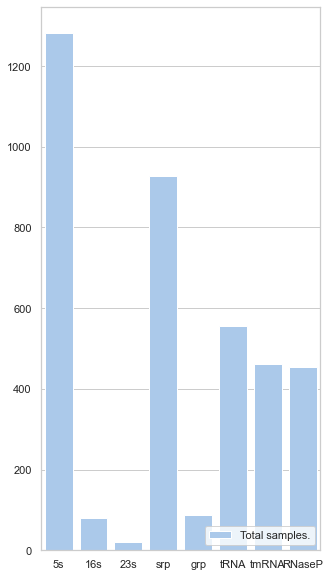

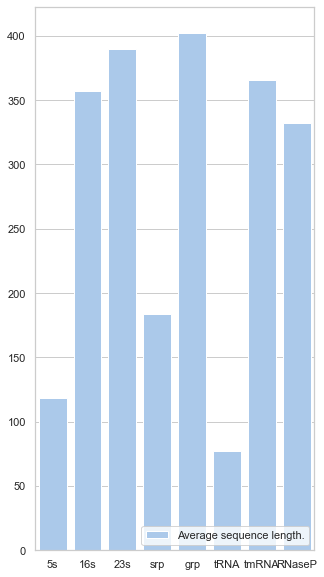

In [24]:
#Dataset distribution: 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5, 10))
# Plot the total for each
sns.set_color_codes("pastel")
sns.barplot( x=group_ids, y= list(map(len, [list_5s, list_16s, list_23s, list_srp, list_grp, list_TRNA, list_tmRNA, list_RNaseP])), label="Total samples.", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)

# Average length for each group:
def avLenIndList(list):
    sum = 0
    for i in list:
        sum = sum + lens[i]
    return (sum/len(list))

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5, 10))
# Plot the total for each
sns.set_color_codes("pastel")
sns.barplot( x=group_ids, y= list(map(avLenIndList, [list_5s, list_16s, list_23s, list_srp, list_grp, list_TRNA, list_tmRNA, list_RNaseP])), label="Average sequence length.", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)





## 5s


[Text(0.5, 0, 'Sample length.'), Text(0, 0.5, 'Perfect matches.')]

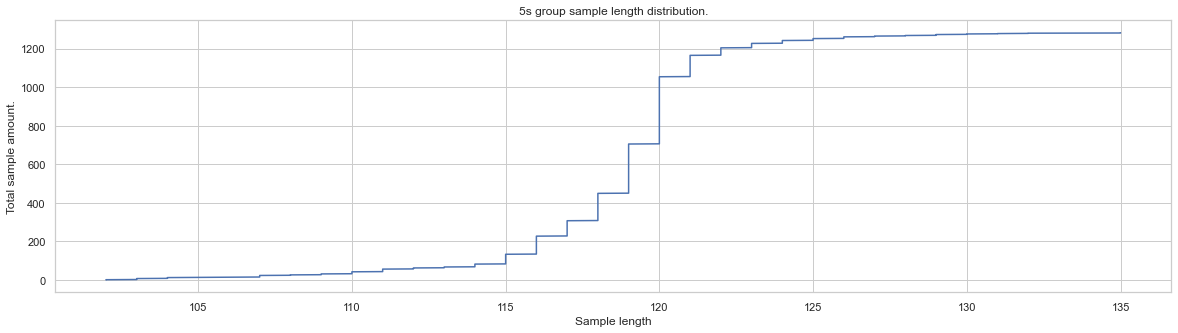

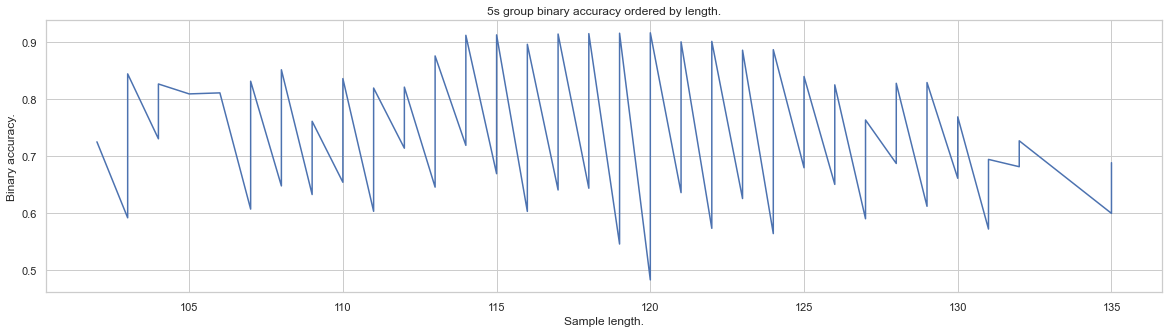

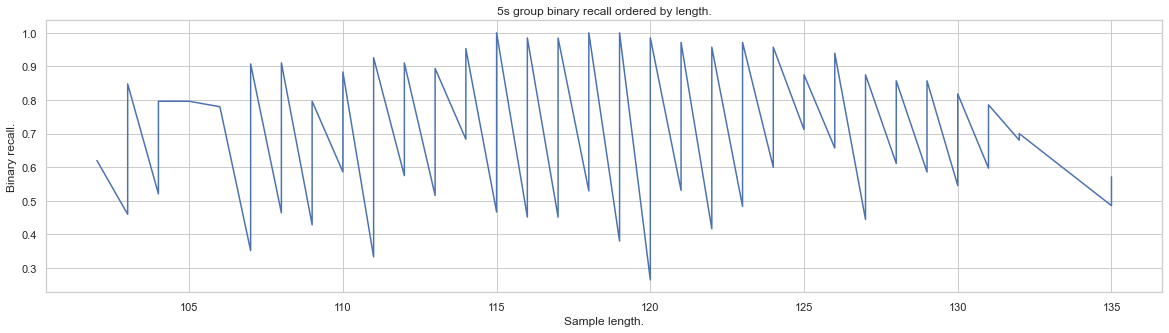

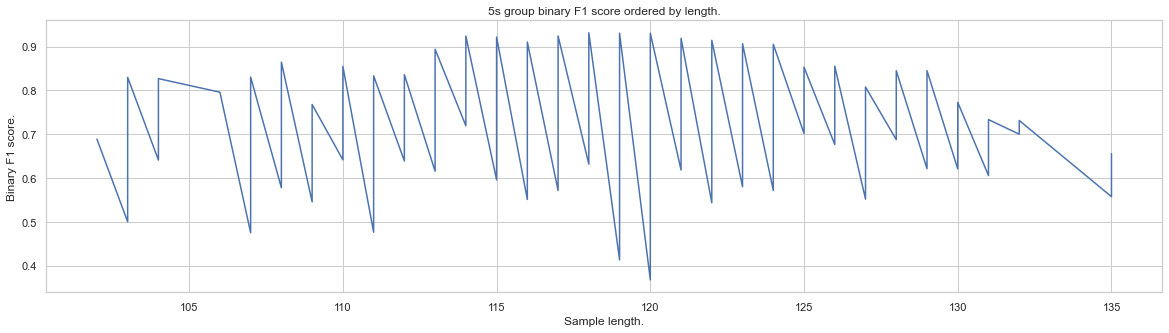

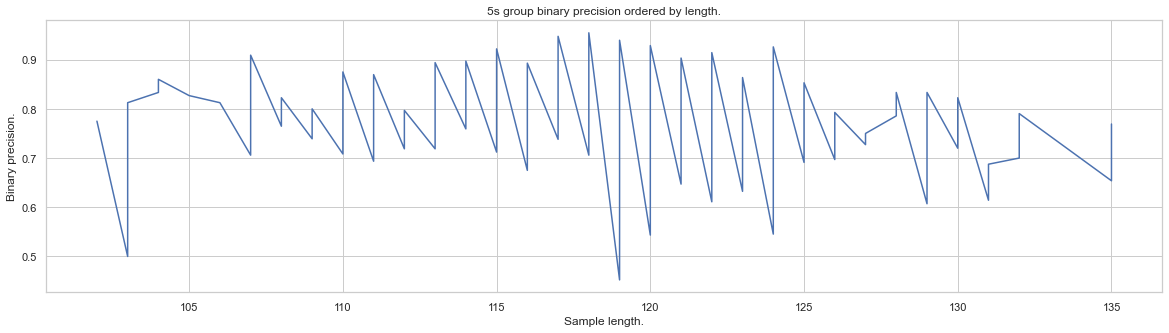

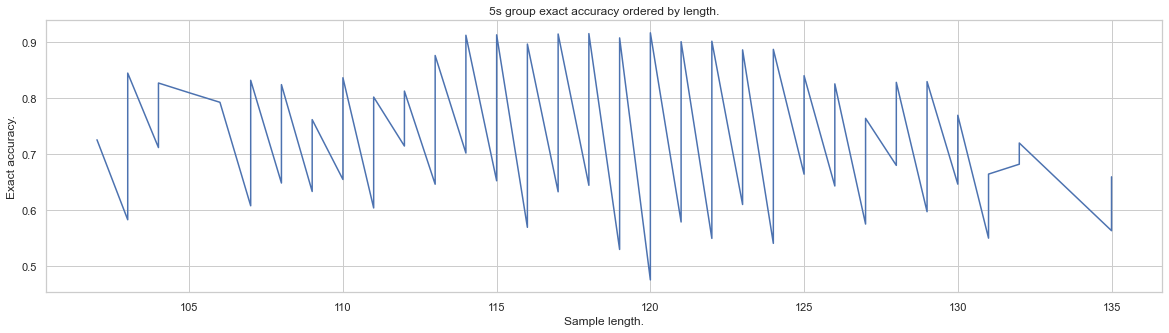

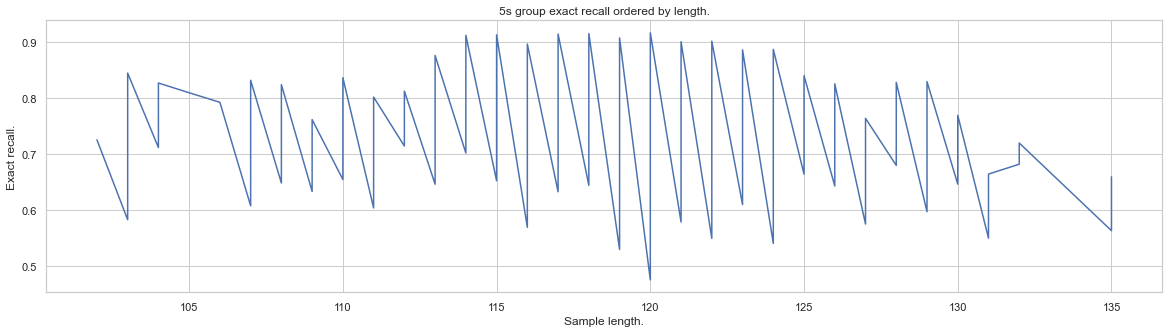

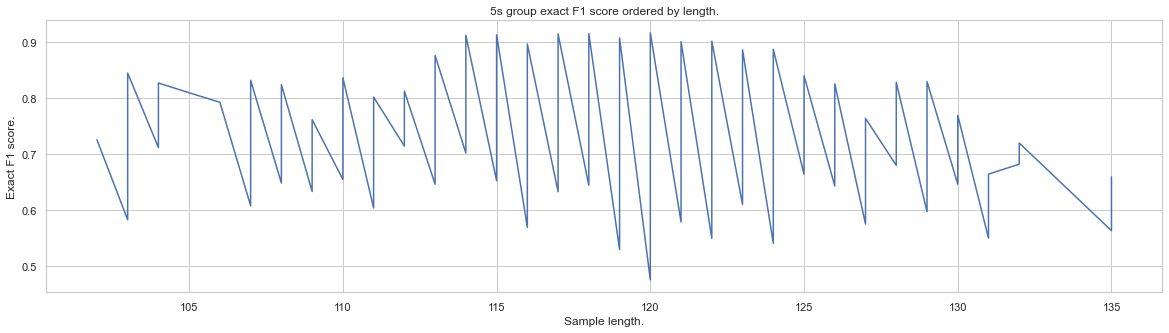

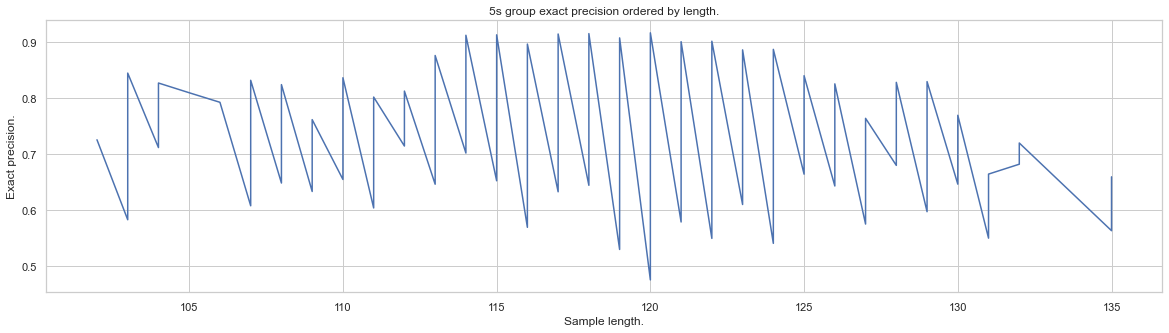

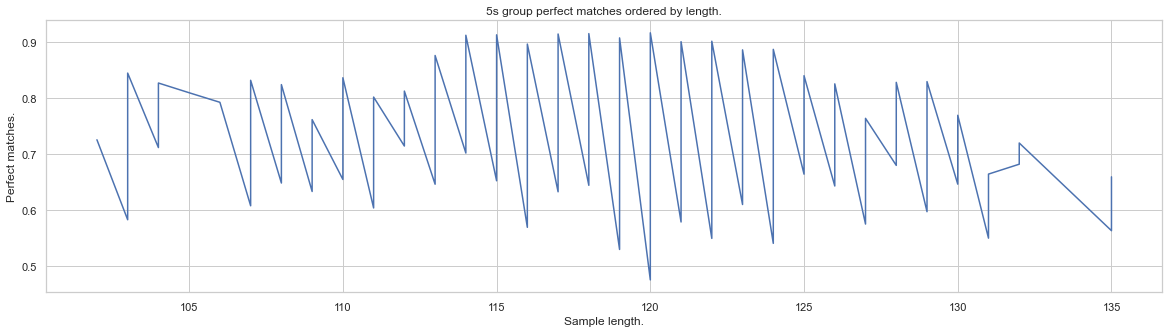

In [25]:
## 5S analisys (E2E)

get_lens            =   [lens[index]            for index in list_5s]
get_bin_acc         =   [list_bin_acc[index]    for index in list_5s]
get_bin_recall      =   [list_bin_recall[index] for index in list_5s]
get_bin_f           =   [list_bin_f[index]      for index in list_5s]
get_bin_precision   =   [list_bin_prec[index]   for index in list_5s]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y= range(0,(len(get_lens))), estimator=None, legend="auto")
ax.set_title("5s group sample length distribution.")
ax.set(xlabel="Sample length", ylabel="Total sample amount.")

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_acc, estimator=None)
ax.set_title("5s group binary accuracy ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary accuracy.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_recall, estimator=None)
ax.set_title("5s group binary recall ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary recall.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_f, estimator=None)
ax.set_title("5s group binary F1 score ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary F1 score.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_precision, estimator=None)
ax.set_title("5s group binary precision ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary precision.") 

get_ex_acc          =   [list_ex_acc[index]     for index in list_5s]
get_ex_recall       =   [list_ex_recall[index]  for index in list_5s]
get_ex_f            =   [list_ex_f[index]       for index in list_5s]
get_ex_prec         =   [list_ex_prec[index]    for index in list_5s]
get_ex_amm          =   [list_ex_amm[index]     for index in list_5s]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_acc, estimator=None)
ax.set_title("5s group exact accuracy ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact accuracy.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_recall, estimator=None)
ax.set_title("5s group exact recall ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact recall.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_f, estimator=None)
ax.set_title("5s group exact F1 score ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact F1 score.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_prec, estimator=None)
ax.set_title("5s group exact precision ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact precision.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_prec, estimator=None)
ax.set_title("5s group perfect matches ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Perfect matches.") 


In [26]:
auxName = "5s"

print ("Average " + auxName + " length = ", sum(get_lens)/len(get_lens))
print ("Average " + auxName + " binary accuracy = ", sum(get_bin_acc)/len(get_bin_acc))
print ("Average " + auxName + " binary recall = ", sum(get_bin_recall)/len(get_bin_recall))
print ("Average " + auxName + " binary f1 score = ", sum(get_bin_f)/len(get_bin_f))
print ("Average " + auxName + " binary precision = ", sum(get_bin_precision)/len(get_bin_precision))

print ("Average " + auxName + " exact match rate = ", sum(get_ex_amm)/len(get_ex_amm))
print ("Average " + auxName + " exact accuracy = ", sum(get_ex_acc)/len(get_ex_acc))
print ("Average " + auxName + " exact recall = ", sum(get_ex_recall)/len(get_ex_recall))
print ("Average " + auxName + " exact f1 score = ", sum(get_ex_f)/len(get_ex_f))
print ("Average " + auxName + " exact precision = ", sum(get_ex_prec)/len(sorted_get_ex_prec))


Average 5s length =  118.71395167575994
Average 5s binary accuracy =  0.81051575109352
Average 5s binary recall =  0.8472736159728356
Average 5s binary f1 score =  0.8303486989166469
Average 5s binary precision =  0.8202821994366641
Average 5s exact match rate =  0.7723058575256553
Average 5s exact accuracy =  0.8034150749727541
Average 5s exact recall =  0.8034150749727541
Average 5s exact f1 score =  0.8034150749727541
Average 5s exact precision =  0.8034150749727541


## 16s

In [27]:
## 16s analisys 
auxList = list_16s
auxName = "16s"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]


sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=range(0,(len(get_lens))), estimator=None, legend="auto")
ax.set_title(auxName + " group sample length distribution")
ax.set(xlabel="Total sample amount.", ylabel="Sample length.")

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_acc, estimator=None)
ax.set_title(auxName + " group binary accuracy ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary accuracy.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_recall, estimator=None)
ax.set_title(auxName + " group binary recall ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary recall.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_f, estimator=None)
ax.set_title(auxName + " group binary F1 score ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary F1 score.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_precision, estimator=None)
ax.set_title(auxName + " group binary precision ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary precision.") 

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]


sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_acc, estimator=None)
ax.set_title(auxName + " group exact accuracy ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact accuracy.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_recall, estimator=None)
ax.set_title(auxName + " group exact recall ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact recall.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_f, estimator=None)
ax.set_title(auxName + " group exact F1 score ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact F1 score.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_prec, estimator=None)
ax.set_title(auxName + " group exact precision ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact precision.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_prec, estimator=None)
ax.set_title(auxName + " group perfect matches ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Perfect matches.") 




SyntaxError: invalid syntax (<ipython-input-27-e4cc40273fe8>, line 12)

In [ ]:
print ("Average " + auxName + " length = ", sum(get_lens)/len(get_lens))
print ("Average " + auxName + " binary accuracy = ", sum(get_bin_acc)/len(get_bin_acc))
print ("Average " + auxName + " binary recall = ", sum(get_bin_recall)/len(get_bin_recall))
print ("Average " + auxName + " binary f1 score = ", sum(get_bin_f)/len(get_bin_f))
print ("Average " + auxName + " binary precision = ", sum(get_bin_precision)/len(get_bin_precision))

print ("Average " + auxName + " exact match rate = ", sum(get_ex_amm)/len(get_ex_amm))
print ("Average " + auxName + " exact accuracy = ", sum(get_ex_acc)/len(get_ex_acc))
print ("Average " + auxName + " exact recall = ", sum(get_ex_recall)/len(get_ex_recall))
print ("Average " + auxName + " exact f1 score = ", sum(get_ex_f)/len(get_ex_f))
print ("Average " + auxName + " exact precision = ", sum(get_ex_prec)/len(sorted_get_ex_prec))


## 23s

In [ ]:
## 23s analisys 
auxList = list_23s
auxName = "23s"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=range(0,(len(get_lens))), estimator=None, legend="auto")
ax.set_title(auxName + " group sample length distribution")
ax.set(xlabel="Total sample amount.", ylabel="Sample length.")

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_acc, estimator=None)
ax.set_title(auxName + " group binary accuracy ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary accuracy.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_recall, estimator=None)
ax.set_title(auxName + " group binary recall ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary recall.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_f, estimator=None)
ax.set_title(auxName + " group binary F1 score ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary F1 score.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_precision, estimator=None)
ax.set_title(auxName + " group binary precision ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary precision.") 

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]


sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_acc, estimator=None)
ax.set_title(auxName + " group exact accuracy ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact accuracy.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_recall, estimator=None)
ax.set_title(auxName + " group exact recall ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact recall.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_f, estimator=None)
ax.set_title(auxName + " group exact F1 score ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact F1 score.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_prec, estimator=None)
ax.set_title(auxName + " group exact precision ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact precision.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_prec, estimator=None)
ax.set_title(auxName + " group perfect matches ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Perfect matches.") 


In [ ]:
print ("Average " + auxName + " length = ", sum(get_lens)/len(get_lens))
print ("Average " + auxName + " binary accuracy = ", sum(get_bin_acc)/len(get_bin_acc))
print ("Average " + auxName + " binary recall = ", sum(get_bin_recall)/len(get_bin_recall))
print ("Average " + auxName + " binary f1 score = ", sum(get_bin_f)/len(get_bin_f))
print ("Average " + auxName + " binary precision = ", sum(get_bin_precision)/len(get_bin_precision))

print ("Average " + auxName + " exact match rate = ", sum(get_ex_amm)/len(get_ex_amm))
print ("Average " + auxName + " exact accuracy = ", sum(get_ex_acc)/len(get_ex_acc))
print ("Average " + auxName + " exact recall = ", sum(get_ex_recall)/len(get_ex_recall))
print ("Average " + auxName + " exact f1 score = ", sum(get_ex_f)/len(get_ex_f))
print ("Average " + auxName + " exact precision = ", sum(get_ex_prec)/len(sorted_get_ex_prec))

## Srp

In [ ]:
## srp analisys 
auxList = list_srp
auxName = "Srp"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=range(0,(len(get_lens))), estimator=None, legend="auto")
ax.set_title(auxName + " group sample length distribution")
ax.set(xlabel="Total sample amount.", ylabel="Sample length.")

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_acc, estimator=None)
ax.set_title(auxName + " group binary accuracy ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary accuracy.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_recall, estimator=None)
ax.set_title(auxName + " group binary recall ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary recall.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_f, estimator=None)
ax.set_title(auxName + " group binary F1 score ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary F1 score.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_precision, estimator=None)
ax.set_title(auxName + " group binary precision ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary precision.") 

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_acc, estimator=None)
ax.set_title(auxName + " group exact accuracy ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact accuracy.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_recall, estimator=None)
ax.set_title(auxName + " group exact recall ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact recall.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_f, estimator=None)
ax.set_title(auxName + " group exact F1 score ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact F1 score.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_prec, estimator=None)
ax.set_title(auxName + " group exact precision ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact precision.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_prec, estimator=None)
ax.set_title(auxName + " group perfect matches ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Perfect matches.") 


In [ ]:
print ("Average " + auxName + " length = ", sum(get_lens)/len(get_lens))
print ("Average " + auxName + " binary accuracy = ", sum(get_bin_acc)/len(get_bin_acc))
print ("Average " + auxName + " binary recall = ", sum(get_bin_recall)/len(get_bin_recall))
print ("Average " + auxName + " binary f1 score = ", sum(get_bin_f)/len(get_bin_f))
print ("Average " + auxName + " binary precision = ", sum(get_bin_precision)/len(get_bin_precision))

print ("Average " + auxName + " exact match rate = ", sum(get_ex_amm)/len(get_ex_amm))
print ("Average " + auxName + " exact accuracy = ", sum(get_ex_acc)/len(get_ex_acc))
print ("Average " + auxName + " exact recall = ", sum(get_ex_recall)/len(get_ex_recall))
print ("Average " + auxName + " exact f1 score = ", sum(get_ex_f)/len(get_ex_f))
print ("Average " + auxName + " exact precision = ", sum(get_ex_prec)/len(sorted_get_ex_prec))


## GRP

In [ ]:
## grp analisys 
auxList = list_grp
auxName = "Grp"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=range(0,(len(get_lens))), estimator=None, legend="auto")
ax.set_title(auxName + " group sample length distribution")
ax.set(xlabel="Total sample amount.", ylabel="Sample length.")

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_acc, estimator=None)
ax.set_title(auxName + " group binary accuracy ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary accuracy.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_recall, estimator=None)
ax.set_title(auxName + " group binary recall ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary recall.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_f, estimator=None)
ax.set_title(auxName + " group binary F1 score ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary F1 score.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_precision, estimator=None)
ax.set_title(auxName + " group binary precision ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary precision.") 

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]


sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_acc, estimator=None)
ax.set_title(auxName + " group exact accuracy ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact accuracy.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_recall, estimator=None)
ax.set_title(auxName + " group exact recall ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact recall.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_f, estimator=None)
ax.set_title(auxName + " group exact F1 score ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact F1 score.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_prec, estimator=None)
ax.set_title(auxName + " group exact precision ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact precision.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_prec, estimator=None)
ax.set_title(auxName + " group perfect matches ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Perfect matches.") 


In [ ]:
print ("Average " + auxName + " length = ", sum(get_lens)/len(get_lens))
print ("Average " + auxName + " binary accuracy = ", sum(get_bin_acc)/len(get_bin_acc))
print ("Average " + auxName + " binary recall = ", sum(get_bin_recall)/len(get_bin_recall))
print ("Average " + auxName + " binary f1 score = ", sum(get_bin_f)/len(get_bin_f))
print ("Average " + auxName + " binary precision = ", sum(get_bin_precision)/len(get_bin_precision))

print ("Average " + auxName + " exact match rate = ", sum(get_ex_amm)/len(get_ex_amm))
print ("Average " + auxName + " exact accuracy = ", sum(get_ex_acc)/len(get_ex_acc))
print ("Average " + auxName + " exact recall = ", sum(get_ex_recall)/len(get_ex_recall))
print ("Average " + auxName + " exact f1 score = ", sum(get_ex_f)/len(get_ex_f))
print ("Average " + auxName + " exact precision = ", sum(get_ex_prec)/len(sorted_get_ex_prec))


## TRNA

In [ ]:
## TRNA analisys 
auxList = list_TRNA
auxName = "TRNA"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=range(0,(len(get_lens))), estimator=None, legend="auto")
ax.set_title(auxName + " group sample length distribution")
ax.set(xlabel="Total sample amount.", ylabel="Sample length.")

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_acc, estimator=None)
ax.set_title(auxName + " group binary accuracy ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary accuracy.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_recall, estimator=None)
ax.set_title(auxName + " group binary recall ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary recall.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_f, estimator=None)
ax.set_title(auxName + " group binary F1 score ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary F1 score.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_precision, estimator=None)
ax.set_title(auxName + " group binary precision ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary precision.") 

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]


sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_acc, estimator=None)
ax.set_title(auxName + " group exact accuracy ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact accuracy.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_recall, estimator=None)
ax.set_title(auxName + " group exact recall ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact recall.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_f, estimator=None)
ax.set_title(auxName + " group exact F1 score ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact F1 score.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_prec, estimator=None)
ax.set_title(auxName + " group exact precision ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact precision.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_prec, estimator=None)
ax.set_title(auxName + " group perfect matches ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Perfect matches.") 

In [ ]:
print ("Average " + auxName + " length = ", sum(get_lens)/len(get_lens))
print ("Average " + auxName + " binary accuracy = ", sum(get_bin_acc)/len(get_bin_acc))
print ("Average " + auxName + " binary recall = ", sum(get_bin_recall)/len(get_bin_recall))
print ("Average " + auxName + " binary f1 score = ", sum(get_bin_f)/len(get_bin_f))
print ("Average " + auxName + " binary precision = ", sum(get_bin_precision)/len(get_bin_precision))

print ("Average " + auxName + " exact match rate = ", sum(get_ex_amm)/len(get_ex_amm))
print ("Average " + auxName + " exact accuracy = ", sum(get_ex_acc)/len(get_ex_acc))
print ("Average " + auxName + " exact recall = ", sum(get_ex_recall)/len(get_ex_recall))
print ("Average " + auxName + " exact f1 score = ", sum(get_ex_f)/len(get_ex_f))
print ("Average " + auxName + " exact precision = ", sum(get_ex_prec)/len(sorted_get_ex_prec))


## TMRNA

In [ ]:
## TmRNA analisys 
auxList = list_tmRNA
auxName = "tmRNA"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=range(0,(len(get_lens))), estimator=None, legend="auto")
ax.set_title(auxName + " group sample length distribution")
ax.set(xlabel="Total sample amount.", ylabel="Sample length.")

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_acc, estimator=None)
ax.set_title(auxName + " group binary accuracy ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary accuracy.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_recall, estimator=None)
ax.set_title(auxName + " group binary recall ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary recall.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_f, estimator=None)
ax.set_title(auxName + " group binary F1 score ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary F1 score.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_precision, estimator=None)
ax.set_title(auxName + " group binary precision ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary precision.") 

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_acc, estimator=None)
ax.set_title(auxName + " group exact accuracy ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact accuracy.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_recall, estimator=None)
ax.set_title(auxName + " group exact recall ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact recall.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_f, estimator=None)
ax.set_title(auxName + " group exact F1 score ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact F1 score.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_prec, estimator=None)
ax.set_title(auxName + " group exact precision ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact precision.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_prec, estimator=None)
ax.set_title(auxName + " group perfect matches ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Perfect matches.") 

In [ ]:
print ("Average " + auxName + " length = ", sum(get_lens)/len(get_lens))
print ("Average " + auxName + " binary accuracy = ", sum(get_bin_acc)/len(get_bin_acc))
print ("Average " + auxName + " binary recall = ", sum(get_bin_recall)/len(get_bin_recall))
print ("Average " + auxName + " binary f1 score = ", sum(get_bin_f)/len(get_bin_f))
print ("Average " + auxName + " binary precision = ", sum(get_bin_precision)/len(get_bin_precision))

print ("Average " + auxName + " exact match rate = ", sum(get_ex_amm)/len(get_ex_amm))
print ("Average " + auxName + " exact accuracy = ", sum(get_ex_acc)/len(get_ex_acc))
print ("Average " + auxName + " exact recall = ", sum(get_ex_recall)/len(get_ex_recall))
print ("Average " + auxName + " exact f1 score = ", sum(get_ex_f)/len(get_ex_f))
print ("Average " + auxName + " exact precision = ", sum(get_ex_prec)/len(sorted_get_ex_prec))


## RNaseP

In [ ]:
## RNaseP analisys 
auxList = list_RNaseP
auxName = "RNaseP"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=range(0,(len(get_lens))), estimator=None, legend="auto")
ax.set_title(auxName + " group sample length distribution")
ax.set(xlabel="Total sample amount.", ylabel="Sample length.")

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_acc, estimator=None)
ax.set_title(auxName + " group binary accuracy ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary accuracy.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_recall, estimator=None)
ax.set_title(auxName + " group binary recall ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary recall.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_f, estimator=None)
ax.set_title(auxName + " group binary F1 score ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary F1 score.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_bin_precision, estimator=None)
ax.set_title(auxName + " group binary precision ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Binary precision.") 

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_acc, estimator=None)
ax.set_title(auxName + " group exact accuracy ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact accuracy.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_recall, estimator=None)
ax.set_title(auxName + " group exact recall ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact recall.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_f, estimator=None)
ax.set_title(auxName + " group exact F1 score ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact F1 score.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_prec, estimator=None)
ax.set_title(auxName + " group exact precision ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Exact precision.") 

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))
# Plot the total for each
sns.set_color_codes("pastel")
sns.lineplot(x=sorted(get_lens), y=sorted_get_ex_prec, estimator=None)
ax.set_title(auxName + " group perfect matches ordered by length.")
ax.set(xlabel="Sample length.", ylabel="Perfect matches.") 

In [ ]:
print ("Average " + auxName + " length = ", sum(get_lens)/len(get_lens))
print ("Average " + auxName + " binary accuracy = ", sum(get_bin_acc)/len(get_bin_acc))
print ("Average " + auxName + " binary recall = ", sum(get_bin_recall)/len(get_bin_recall))
print ("Average " + auxName + " binary f1 score = ", sum(get_bin_f)/len(get_bin_f))
print ("Average " + auxName + " binary precision = ", sum(get_bin_precision)/len(get_bin_precision))

print ("Average " + auxName + " exact match rate = ", sum(get_ex_amm)/len(get_ex_amm))
print ("Average " + auxName + " exact accuracy = ", sum(get_ex_acc)/len(get_ex_acc))
print ("Average " + auxName + " exact recall = ", sum(get_ex_recall)/len(get_ex_recall))
print ("Average " + auxName + " exact f1 score = ", sum(get_ex_f)/len(get_ex_f))
print ("Average " + auxName + " exact precision = ", sum(get_ex_prec)/len(sorted_get_ex_prec))


## End stats: